# Calibrating the Liquid Drop Model Challenge

The purpose of this challenge is for you to calibrate the Liquid Drop Model https://en.wikipedia.org/wiki/Semi-empirical_mass_formula.

If you have never done anything with Python, we suggest you take a look at this: https://www.youtube.com/watch?v=AJFen_Z3mWM&t=1524s. Also, ChatGPT can be of much help to start learning how to code well: https://chatgpt.com/

Your task are to:

*Non-Bayesian way:
- Import the data from the AME 2016 table (included in the github). We are only using nuclei above A=16 to avoid light nuclei where the LDM fails particularly. Perform a curve fit using the built in functions from python (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) and take note of the reported uncertainties in the parameters. 

- Construct a cost function as the sum of the squares of the residuals between your model predictions and the experimental data.

- Numerically minimize this cost function as a function of the four Liquid Drop Model parameters (search on google for scipy minimize function). The optimal parameters will come out of the minimization. 

- Make a plot of the residual of your calibrated model and the experimental data. Notice anything interesting pattern? 



*Bayesian way:
- Make a model calibration using the Bayesian formalism that is defined in the acompaning file "# Guided Example Bayesian calibration". For the error, use your estimation from the previous point (the model error in this case is much smaller than the actual experimental uncertainties). 

- Plot the corner plot posterior as well as the model values on the Binding Energy per nucleon for the Calcium chain up to 60Ca including the available experimental data.

- What would be the results if you have used in the calibration the Binding Energy per nucleon instead of the total Binding Energy?

- Bonus: Find the experimental error in the masses and repeat the calibration using only experimental errors. This should give a good demonstration on the dangers of not taking into account model errors. 


In [27]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

<class 'numpy.ndarray'>


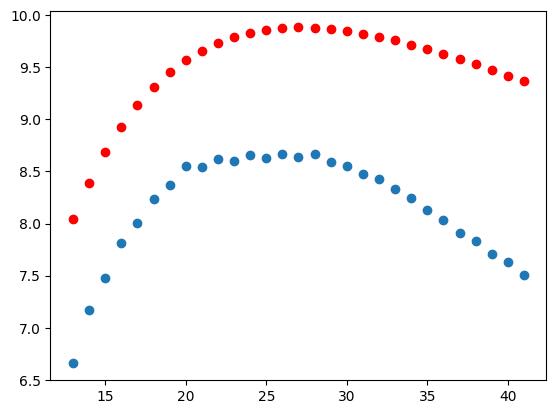

In [48]:
data = np.loadtxt('CorrectedMasses.txt', skiprows=1)
print(type(data))
def LDM(params, x):
    #x = (n,z)
    #params= parameters (volume, surface, asymmetry, Coulomb)
    
    n=x[0]
    z=x[1]
    
    return params[0]*(n+z) - params[1]*(n+z)**(2/3) - params[2]*((n-z)**2/(n+z)) - params[3]*((z**2)/((n+z)**(1/3)))

calcium_data = data[data[:, 1] == 20]
n = calcium_data[:, 0]#.flatten()
z = calcium_data[:, 1]#.flatten()
be = calcium_data[:, 2]

plt.scatter(n, be, label="Exp")
# y_data = data[:, 2].flatten()

# popt, pcov = curve_fit(LDM, (n, z), ydata=y_data)
parameters_guess = [16,15,14,0.7]
binding_energy_LDM_calcium = [LDM(parameters_guess, [x, 20]) / (x + 20) for x in n]
plt.scatter(n, binding_energy_LDM_calcium, label="LDM", color="red")


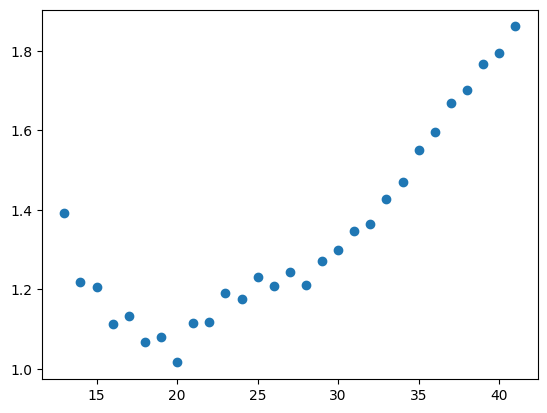

In [39]:
residuals = [binding_energy_LDM_calcium - be]
plt.scatter(n, residuals)

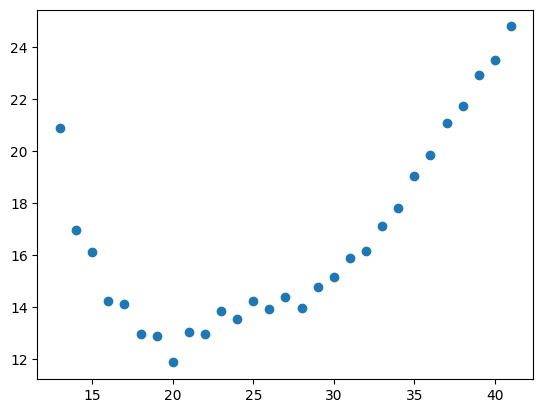

In [40]:
percent_error = [(binding_energy_LDM_calcium - be) / be * 100]
plt.scatter(n, percent_error)

In [49]:
def cost(paramters):
    binding_energy_residuals = np.array([LDM(paramters, [data[i, 0], data[i, 1]]) / (data[i, 0] + data[i, 1]) - data[i, 2] for i in range(len(data))])
    return np.linalg.norm(binding_energy_residuals)**2


In [50]:
from scipy.optimize import minimize
result = minimize(cost, parameters_guess)
result.x

array([12.7343495 , 10.64555062, 12.43401828,  0.45563278])

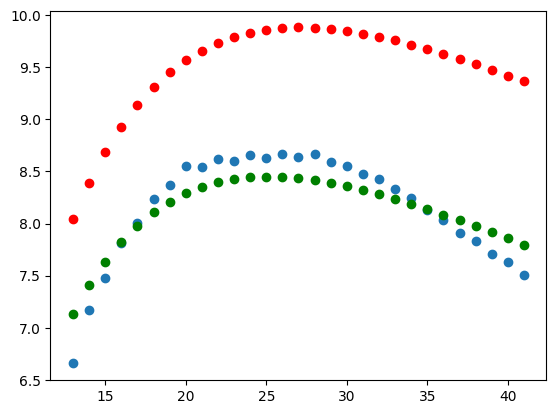

In [55]:
binding_energy_LDM_calcium_calibrated = [LDM(result.x, [x, 20]) / (x + 20) for x in n]
plt.scatter(n, be, label="Experimental Data")
plt.scatter(n, binding_energy_LDM_calcium, color="red", label="Initial Model")
plt.scatter(n, binding_energy_LDM_calcium_calibrated, color="green", label="Calibrated Model")


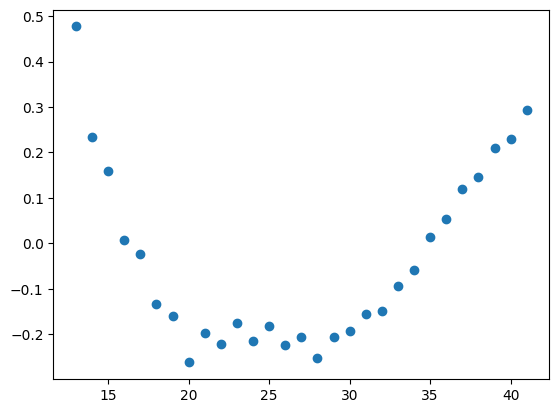

In [52]:
residuals_calibrated = [binding_energy_LDM_calcium_calibrated - be]
plt.scatter(n, residuals_calibrated)